### 1. Import the retail_shop_data file and view the first 5 rows. Check how many rows and columns are in the DataFrame. Check for duplicates.

In [1]:
import pandas as pd

# Load the data
file_path = 'retail_shop_data.csv'
df = pd.read_csv(file_path)

# View the first 5 rows
print(df.head())

# Check the number of rows and columns
print(df.shape)

# Check for duplicates
print(df.duplicated().sum())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


        Date  Customer ID  Product ID Product Name  Cost  Price  Quantity  \
0  1 01 2023         1001         101      T-Shirt    18     20         2   
1  1 01 2023         1002         102        Jeans    35     50         1   
2  2 01 2023         1003         103       Hoodie    25     30         3   
3  3 01 2023         1004         104     Sneakers    55     70         2   
4  3 01 2023         1005         105   Sunglasses    17     25         1   

   Total  
0     40  
1     50  
2     90  
3    140  
4     25  
(21, 8)
0


### 2. Create a copy of the DataFrame and rename columns.

In [3]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Rename columns
df_copy.rename(columns={"Total": "Revenue", "Price": "Price Per Product", "Cost": "Cost Per Product"}, inplace=True)
df_copy.head()


,Date,Customer ID,Product ID,Product Name,Cost Per Product,Price Per Product,Quantity,Revenue
0,1 01 2023,1001,101,T-Shirt,18,20,2,40
1,1 01 2023,1002,102,Jeans,35,50,1,50
2,2 01 2023,1003,103,Hoodie,25,30,3,90
3,3 01 2023,1004,104,Sneakers,55,70,2,140
4,3 01 2023,1005,105,Sunglasses,17,25,1,25


### 3. Calculate total cost of products and add this as a column "Costs". Calculate the profit and add this as a column "Profit".

In [5]:
# Calculate total cost of products and add this as a column "Costs"
df_copy['Costs'] = df_copy['Cost Per Product'] * df_copy['Quantity']

# Calculate the profit and add this as a column "Profit"
df_copy['Profit'] = df_copy['Revenue'] - df_copy['Costs']

df_copy.head()

,Date,Customer ID,Product ID,Product Name,Cost Per Product,Price Per Product,Quantity,Revenue,Costs,Profit
0,1 01 2023,1001,101,T-Shirt,18,20,2,40,36,4
1,1 01 2023,1002,102,Jeans,35,50,1,50,35,15
2,2 01 2023,1003,103,Hoodie,25,30,3,90,75,15
3,3 01 2023,1004,104,Sneakers,55,70,2,140,110,30
4,3 01 2023,1005,105,Sunglasses,17,25,1,25,17,8


### 4. Add a column "Filter" to check for products with a profit margin above 15 dollars.

In [7]:
# Add a column "Filter"
df_copy['Filter'] = df_copy['Profit'] > 15

df_copy.head()

,Date,Customer ID,Product ID,Product Name,Cost Per Product,Price Per Product,Quantity,Revenue,Costs,Profit,Filter
0,1 01 2023,1001,101,T-Shirt,18,20,2,40,36,4,False
1,1 01 2023,1002,102,Jeans,35,50,1,50,35,15,False
2,2 01 2023,1003,103,Hoodie,25,30,3,90,75,15,False
3,3 01 2023,1004,104,Sneakers,55,70,2,140,110,30,True
4,3 01 2023,1005,105,Sunglasses,17,25,1,25,17,8,False


### 5. Which products have a profit margin of over 15 dollars?

In [9]:
# Filter products with profit margin over 15 dollars
high_profit_products = df_copy[df_copy['Filter']]
print(high_profit_products)

         Date  Customer ID  Product ID Product Name  Cost Per Product  \
3   3 01 2023         1004         104     Sneakers                55   
7   6 01 2023         1008         108       Jacket                63   
13  9 01 2023         1008         108       Jacket                63   

    Price Per Product  Quantity  Revenue  Costs  Profit  Filter  
3                  70         2      140    110      30    True  
7                  80         1       80     63      17    True  
13                 80         2      160    126      34    True  


In [30]:
high_profit_products['Product Name'].tolist()

['Sneakers', 'Jacket', 'Jacket']

### 6. Check the difference in profit between jackets and sneakers.

In [31]:
# Calculate the profit for jackets and sneakers
jacket_profit = df_copy[df_copy['Product Name'] == 'Jacket']['Profit'].sum()
sneakers_profit = df_copy[df_copy['Product Name'] == 'Sneakers']['Profit'].sum()
profit_difference = jacket_profit - sneakers_profit

print(profit_difference)

21


### 7. Difference in costs between the most profitable product and the least profitable product.

In [32]:
# Most and least profitable products
most_profitable = df_copy.loc[df_copy['Profit'].idxmax()]
least_profitable = df_copy.loc[df_copy['Profit'].idxmin()]

cost_difference = most_profitable['Costs'] - least_profitable['Costs']

print(cost_difference)

98


### 8. Access the total costs of jackets using the .loc attribute.

In [33]:
# Total costs of jackets
jacket_costs = df_copy.loc[df_copy['Product Name'] == 'Jacket', 'Costs'].sum()

print(jacket_costs)

189


### 9. Create a bar stack plot of the sales, costs, and profits of the 6 least profitable products.

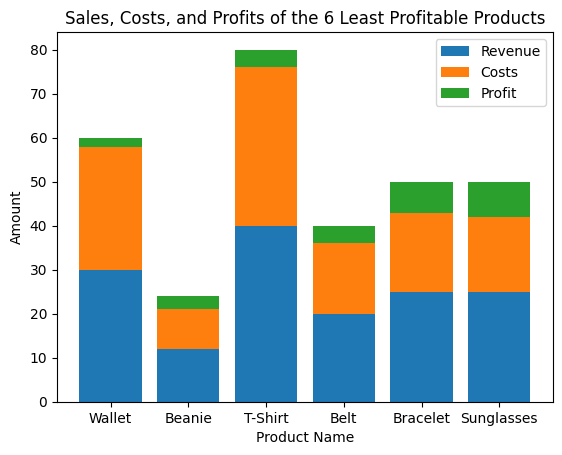

In [17]:
import matplotlib.pyplot as plt

# Sort by profit in ascending order and select the 6 least profitable products
least_profitable_products = df_copy.nsmallest(6, 'Profit')

# Plot
plt.bar(least_profitable_products['Product Name'], least_profitable_products['Revenue'], label='Revenue')
plt.bar(least_profitable_products['Product Name'], least_profitable_products['Costs'], bottom=least_profitable_products['Revenue'], label='Costs')
plt.bar(least_profitable_products['Product Name'], least_profitable_products['Profit'], bottom=least_profitable_products['Costs']+least_profitable_products['Revenue'], label='Profit')

plt.xlabel('Product Name')
plt.ylabel('Amount')
plt.title('Sales, Costs, and Profits of the 6 Least Profitable Products')
plt.legend()

plt.show()

### 10. Calculate the profit of the sunglasses using the .loc attribute.

In [34]:
# Profit of sunglasses
sunglasses_profit = df_copy.loc[df_copy['Product Name'] == 'Sunglasses', 'Profit'].sum()

print(sunglasses_profit)

8


### 11. Calculate the profit of hoodies using the .loc attribute.

In [21]:
# Profit of hoodies
hoodies_profit = df_copy.loc[df_copy['Product Name'] == 'Hoodie', 'Profit'].sum()

print(hoodies_profit)

15


### 12. Return the names of the two least profitable products using the .iloc attribute.

In [23]:
# Two least profitable products
least_profitable_names = df_copy.nsmallest(2, 'Profit')['Product Name']

print(least_profitable_names)

16    Wallet
12    Beanie
Name: Product Name, dtype: object


### 13. Return a DataFrame subset of the most profitable product using the .loc attribute.

In [25]:
# Most profitable product
most_profitable_subset = df_copy.loc[df_copy['Profit'].idxmax()]

print(most_profitable_subset)

Date                 9 01 2023
Customer ID               1008
Product ID                 108
Product Name            Jacket
Cost Per Product            63
Price Per Product           80
Quantity                     2
Revenue                    160
Costs                      126
Profit                      34
Filter                    True
Name: 13, dtype: object


### 14. Create a scatter plot to visualize the relationship between sales and costs for each product using Seaborn.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


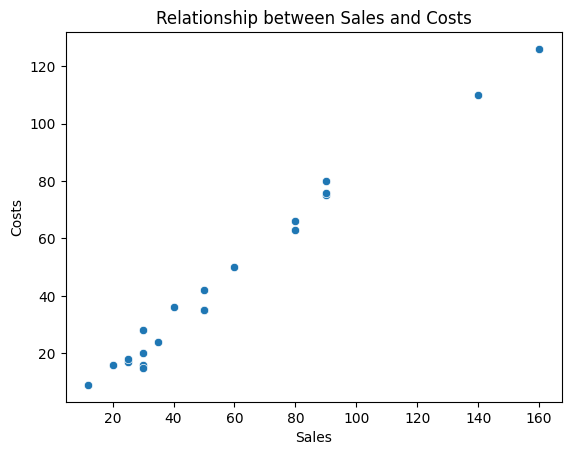

In [27]:
import seaborn as sns

# Scatter plot
sns.scatterplot(x='Revenue', y='Costs', data=df_copy)

plt.xlabel('Sales')
plt.ylabel('Costs')
plt.title('Relationship between Sales and Costs')
plt.show()